<center>
<h1>CSCI3151 - Foundations of Machine Learning</h1>
<h2>Assignment 2</h2>

<b> Due on: Monday March 4, 2024 at 23:59 ADT</b>


</center>


## **1. Multi-class classification using neural networks**

In this question you will experiment with a neural network in the context of image classification, where a image can belong to one out of several possible categories. The main goal for you is to try different hyperparameters in a systematic manner so that you can propose a network configuration that is properly justified. You will experiment with the [MNIST digits](https://keras.io/api/datasets/mnist/), which can be loaded directly from Keras:

```python
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
```

In [1]:
import tensorflow as tf
from keras.datasets import mnist
from keras import layers, models

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# normalize values
X_train = X_train / 255
X_test = X_test / 255

/Users/arashtashakori/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Build a sequential model using `keras.models.Sequential` and add dense layers and experiment with it. Compile and train the model.


In [2]:
# your code here
# Reshaping the 3D arrays to a 2D array of train/test number of samples and their respective value (image)
X_train = X_train.reshape((60000, 28*28))
X_test = X_test.reshape((10000, 28*28))

# Convert final labels into vectors with one "hot" encoded index
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Build the model with three dense layers
model = models.Sequential()
#Layers:
model.add(layers.Dense(512, activation="relu", input_shape=(28*28,)))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(10, activation="sigmoid"))


model.compile(optimizer="rmsprop",loss="mse",metrics=['accuracy'])

# Training model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.01)

Epoch 1/10
465/465 [==============================] - 2s 3ms/step - loss: 0.0141 - accuracy: 0.9185 - val_loss: 0.0061 - val_accuracy: 0.9650
Epoch 2/10
465/465 [==============================] - 2s 3ms/step - loss: 0.0051 - accuracy: 0.9705 - val_loss: 0.0043 - val_accuracy: 0.9750
Epoch 3/10
465/465 [==============================] - 2s 3ms/step - loss: 0.0034 - accuracy: 0.9802 - val_loss: 0.0040 - val_accuracy: 0.9767
Epoch 4/10
465/465 [==============================] - 2s 3ms/step - loss: 0.0025 - accuracy: 0.9855 - val_loss: 0.0032 - val_accuracy: 0.9817
Epoch 5/10
465/465 [==============================] - 2s 3ms/step - loss: 0.0020 - accuracy: 0.9892 - val_loss: 0.0039 - val_accuracy: 0.9767
Epoch 6/10
465/465 [==============================] - 1s 3ms/step - loss: 0.0016 - accuracy: 0.9911 - val_loss: 0.0037 - val_accuracy: 0.9750
Epoch 7/10
465/465 [==============================] - 2s 4ms/step - loss: 0.0013 - accuracy: 0.9930 - val_loss: 0.0036 - val_accuracy: 0.9800
Epoch 

In [3]:
# evaluate your model by running the code below
score = model.evaluate(X_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 0s 814us/step - loss: 0.0031 - accuracy: 0.9822
Test score: 0.0030898540280759335
Test accuracy: 0.982200026512146


As we load the data from the built-in keras function, it splits them into two subsets; however, it is recommended to split the data into three subsets such as:

```
70% train, 15% val, 15% test
```

Use the mentioned ratios to split the data and train the model using these portions. For each one of your experiments, train the model and report the loss and accuracy of model on the training and validation set. (for more information check this [link](https://scikit-learn.org/stable/modules/learning_curve.html#:~:text=2.-,Learning%20curve,error%20or%20a%20bias%20error.))  

> Note: since the dataset is already split into train and test sets for you, you should concatenate and shuffle the two sets before splitting them again to achieve the ratios you want


In [4]:
# your code here
import numpy as np

#Resetting and reshaping the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape((60000, 28*28))
X_test = X_test.reshape((10000, 28*28))

# Concatenate the original train and test sets
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# Shuffling the data for both X and y
np.random.seed(42)
shuffle_indexes = np.random.permutation(len(X))
X = X[shuffle_indexes]
y = y[shuffle_indexes]

# Split the data into three sets of training validation and test
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))
X_train = X[:train_size]
y_train = y[:train_size]
X_val = X[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]
X_test = X[train_size + val_size:]
y_test = y[train_size + val_size:]

# Convert final labels into vectors with one "hot" encoded index
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Build the model with three dense layers
model = models.Sequential()
#Layers:
model.add(layers.Dense(512, activation="relu", input_shape=(28*28,)))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(10, activation="sigmoid"))

model.compile(optimizer="rmsprop",loss="mse",metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.01)

#Evaluation
score = model.evaluate(X_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
379/379 [==============================] - 2s 4ms/step - loss: 0.0158 - accuracy: 0.9084 - val_loss: 0.0071 - val_accuracy: 0.9571
Epoch 2/10
379/379 [==============================] - 1s 3ms/step - loss: 0.0055 - accuracy: 0.9684 - val_loss: 0.0049 - val_accuracy: 0.9673
Epoch 3/10
379/379 [==============================] - 1s 3ms/step - loss: 0.0036 - accuracy: 0.9798 - val_loss: 0.0040 - val_accuracy: 0.9776
Epoch 4/10
379/379 [==============================] - 1s 4ms/step - loss: 0.0027 - accuracy: 0.9847 - val_loss: 0.0039 - val_accuracy: 0.9776
Epoch 5/10
379/379 [==============================] - 1s 4ms/step - loss: 0.0020 - accuracy: 0.9888 - val_loss: 0.0033 - val_accuracy: 0.9796
Epoch 6/10
379/379 [==============================] - 2s 4ms/step - loss: 0.0016 - accuracy: 0.9910 - val_loss: 0.0042 - val_accuracy: 0.9735
Epoch 7/10
379/379 [==============================] - 1s 3ms/step - loss: 0.0013 - accuracy: 0.9930 - val_loss: 0.0035 - val_accuracy: 0.9796
Epoch 

b) Experiment with different hyperparameters and report your best accuracy found. The most important hyperparameters that you need to experiment with in this question part are:

* number of layers
* nodes per hidden layer
* learning rate
* number of epochs

Perform at least three experiments, being sure to vary only one hyperparameter at a time. To select the best choice of hyperparameters, draw the loss and accuracy curve.

In [5]:
# your code here
#EXPERIMENT NUMBER 1: NUMBER OF LAYERS
#MODEL NUMBER 1 : 4 Layers
modelNoOne = models.Sequential(name="4_Layers")
modelNoOne.add(layers.Dense(512, activation="relu", input_shape=(28*28,)))
modelNoOne.add(layers.Dense(256, activation="relu"))
modelNoOne.add(layers.Dense(128, activation="relu"))
modelNoOne.add(layers.Dense(10, activation="sigmoid"))

modelNoOne.compile(optimizer="rmsprop", loss="mse", metrics=['accuracy'])

history1 = modelNoOne.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

# Evaluate the model
score1 = modelNoOne.evaluate(X_test, y_test)
print('Experiment 1_1 - Test score:', score1[0])
print('Experiment 1_1 - Test accuracy:', score1[1])

#MODEL NUMBER 2 : 2 Layers
modelNoTwo = models.Sequential(name="2_Layers")
modelNoTwo.add(layers.Dense(512, activation="relu", input_shape=(28*28,)))
modelNoTwo.add(layers.Dense(10, activation="sigmoid"))

modelNoTwo.compile(optimizer="rmsprop", loss="mse", metrics=['accuracy'])

history2 = modelNoTwo.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

# Evaluate the model
score2 = modelNoTwo.evaluate(X_test, y_test)
print("Experiment 1_2 - Test score:", score2[0])
print("Experiment 1_2 - Test accuracy:", score2[1])


#EXPERIMENT #2: NUMBER OF NODES PER HIDDEN LAYER
#MODEL NUMBER I: 256, 128 and 10
modelI = models.Sequential(name="256_128_10_nodes")
modelI.add(layers.Dense(256, activation="relu", input_shape=(28*28,)))
modelI.add(layers.Dense(128, activation="relu"))
modelI.add(layers.Dense(10, activation="sigmoid"))

modelI.compile(optimizer="rmsprop", loss="mse", metrics=['accuracy'])

historyI = modelI.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

# Evaluate the model
scoreI = modelI.evaluate(X_test, y_test)
print("Experiment 2_1 - Test score:", scoreI[0])
print("Experiment 2_1 - Test accuracy:", scoreI[1])

#MODEL NUMBER II: 2048, 1024 and 10
modelII = models.Sequential(name="2048_1024_10_nodes")
modelII.add(layers.Dense(2048, activation="relu", input_shape=(28*28,)))
modelII.add(layers.Dense(1024, activation="relu"))
modelII.add(layers.Dense(10, activation="sigmoid"))

modelII.compile(optimizer="rmsprop", loss="mse", metrics=['accuracy'])

historyII = modelII.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

# Evaluate the model
scoreII = modelII.evaluate(X_test, y_test)
print("Experiment 2_2 - Test score:", scoreII[0])
print("Experiment 2_2 - Test accuracy:", scoreII[1])


#EXPERIMENT #3: NUMBER OF EPHOCHS
#MODEL A: epoch = 5
modelA = models.Sequential(name="epoch_5")
modelA.add(layers.Dense(256, activation="relu", input_shape=(28*28,)))
modelA.add(layers.Dense(128, activation="relu"))
modelA.add(layers.Dense(10, activation="sigmoid"))

modelA.compile(optimizer="rmsprop", loss="mse", metrics=['accuracy'])

historyA = modelA.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_val, y_val))

# Evaluate the model
scoreA = modelA.evaluate(X_test, y_test)
print("Experiment 3_1 - Test score:", scoreA[0])
print("Experiment 3_1 - Test accuracy:", scoreA[1])

#MODEL B: epoch = 15
modelB = models.Sequential(name="epoch_15")
modelB.add(layers.Dense(256, activation="relu", input_shape=(28*28,)))
modelB.add(layers.Dense(128, activation="relu"))
modelB.add(layers.Dense(10, activation="sigmoid"))

modelB.compile(optimizer="rmsprop", loss="mse", metrics=['accuracy'])

historyB = modelB.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_val, y_val))

# Evaluate the model
scoreB = modelB.evaluate(X_test, y_test)
print("Experiment 3_2 - Test score:", scoreB[0])
print("Experiment 3_2 - Test accuracy: ", scoreB[1])

#PLOT IS IN THE NEXT CODE SECTION

Epoch 1/10
383/383 [==============================] - 2s 5ms/step - loss: 0.0161 - accuracy: 0.8991 - val_loss: 0.0066 - val_accuracy: 0.9600
Epoch 2/10
383/383 [==============================] - 2s 4ms/step - loss: 0.0051 - accuracy: 0.9687 - val_loss: 0.0056 - val_accuracy: 0.9648
Epoch 3/10
383/383 [==============================] - 2s 4ms/step - loss: 0.0035 - accuracy: 0.9782 - val_loss: 0.0040 - val_accuracy: 0.9739
Epoch 4/10
383/383 [==============================] - 2s 5ms/step - loss: 0.0026 - accuracy: 0.9839 - val_loss: 0.0038 - val_accuracy: 0.9755
Epoch 5/10
383/383 [==============================] - 2s 6ms/step - loss: 0.0020 - accuracy: 0.9882 - val_loss: 0.0041 - val_accuracy: 0.9738
Epoch 6/10
383/383 [==============================] - 2s 6ms/step - loss: 0.0018 - accuracy: 0.9891 - val_loss: 0.0044 - val_accuracy: 0.9733
Epoch 7/10
383/383 [==============================] - 2s 5ms/step - loss: 0.0015 - accuracy: 0.9913 - val_loss: 0.0039 - val_accuracy: 0.9756
Epoch 

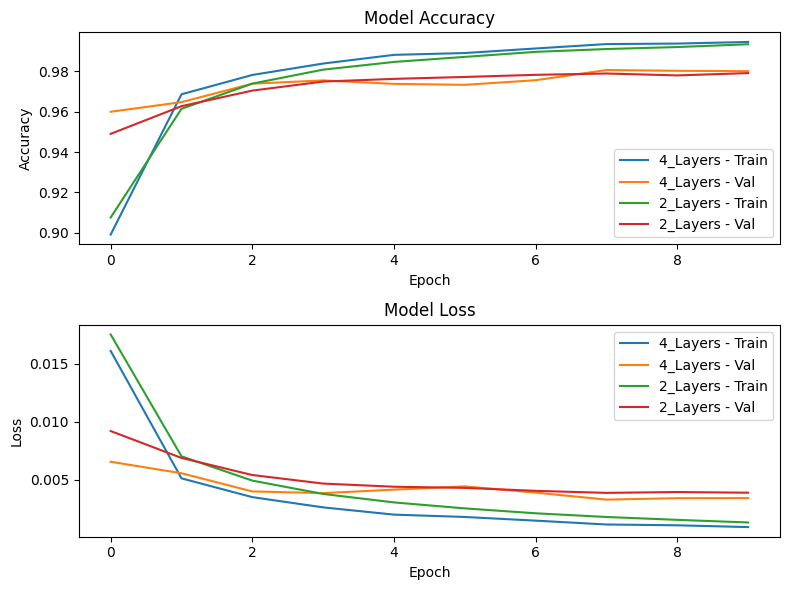

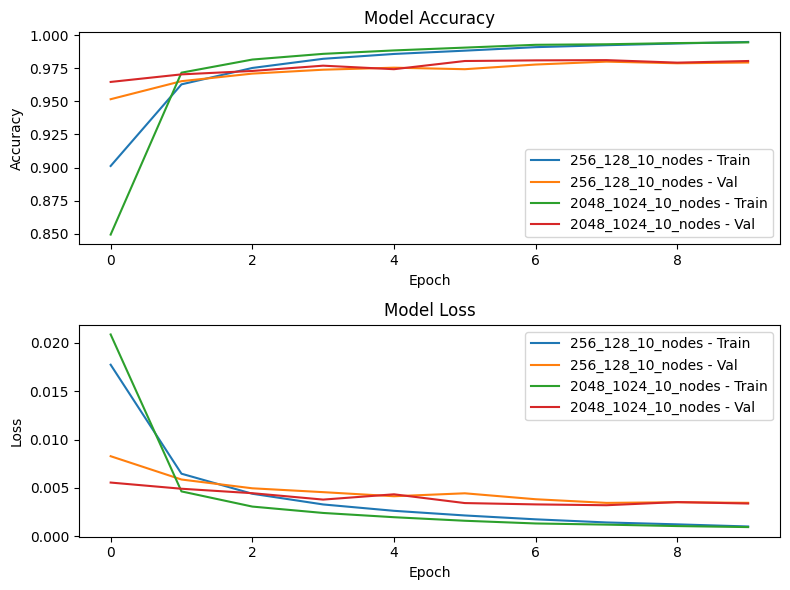

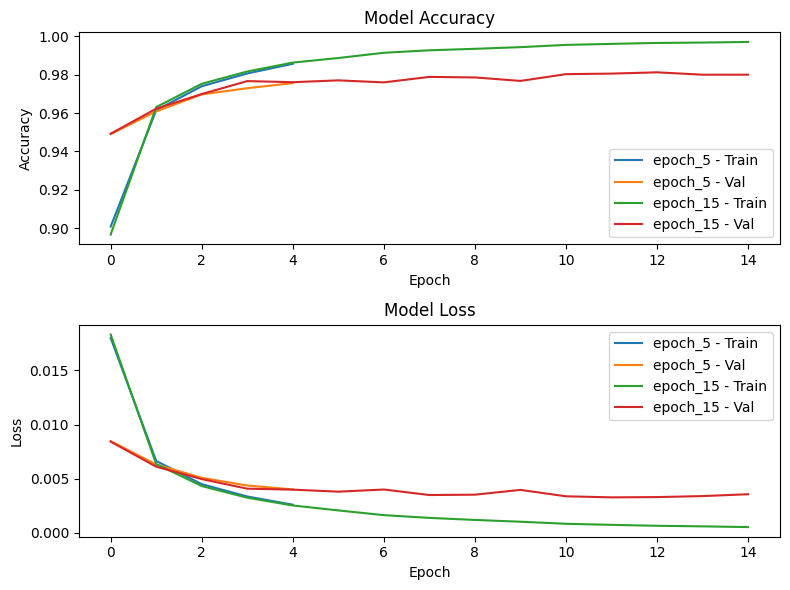

In [6]:
import matplotlib.pyplot as plt

def plot_history(histories, title='Accuracy and Loss With Diff Hyperparams'):
    figure, axis = plt.subplots(2, 1, figsize=(8, 6))

    # Plot for the accuracy of models
    for history in histories:
        axis[0].plot(history.history["accuracy"], label=f"{history.model.name} - Train")
        axis[0].plot(history.history["val_accuracy"], label=f"{history.model.name} - Val")

    axis[0].set_title("Model Accuracy")
    axis[0].set_ylabel("Accuracy")
    axis[0].set_xlabel("Epoch")
    axis[0].legend()

    # Plot for the loss of all the functions
    for history in histories:
        axis[1].plot(history.history["loss"], label=f"{history.model.name} - Train")
        axis[1].plot(history.history["val_loss"], label=f"{history.model.name} - Val")

    axis[1].set_title("Model Loss")
    axis[1].set_ylabel("Loss")
    axis[1].set_xlabel("Epoch")
    axis[1].legend()

    plt.tight_layout()
    plt.show()

# Plotting the results
plot_history([history1, history2])
plot_history([historyI, historyII])
plot_history([historyA, historyB])

In [7]:
#WHERE AND WHAT IS THE BEST ACCURACY?
# Store the accuracies and model names in a dictionary
accuracy = {
    "Experiment 1_1 (4 Layers)": score1[1],
    "Experiment 1_2 (2 Layers)": score2[1],
    "Experiment 2_1 (256, 128 Nodes)": scoreI[1],
    "Experiment 2_2 (2048, 1024 Nodes)": scoreII[1],
    "Experiment 3_1 (5 Epochs)": scoreA[1],
    "Experiment 3_2 (15 Epochs)": scoreB[1]
}

# Find the experiment with the best accuracy
best_experiment = max(accuracy, key=accuracy.get)
best_accuracy = accuracy[best_experiment]

print(f"The best accuracy found is {best_accuracy:f} in {best_experiment}.")


The best accuracy found is 0.979524 in Experiment 3_2 (15 Epochs).


## **2. Tuning generalization**

In this question you will construct a neural network to classify a large set of low resolution images. Different from Q1, in this case we suggest a neural network to start experimenting with, but we would like you to describe the behavior of the network as you modify certain parameters. You will be reproducing some concepts mentioned during the lectures, such as when we show how generalization changes as the number of parameters are changed.

a) Use the CIFAR-100 dataset (available from Keras)

```python
from keras.datasets import cifar100
(x_train_original, y_train_original), (x_test_original, y_test_original) =
cifar100.load_data(label_mode='fine')
```
to train a neural network with two hidden layers using the logistic activation function, with 500 and 200 hidden nodes, respectively. The output layer should be defined according to the nature of the targets.

a) Generate a plot that shows average precision for training and test sets as a function of the number of epochs. Indicate what a reasonable number of epochs should be.


In [8]:
from keras.datasets import cifar100

(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')
x_train_original, x_test_original = x_train_original / 255.0, x_test_original / 255.0

In [9]:
from keras.callbacks import History, Callback

# your model code here
# Convert final labels into vectors with one "hot" encoded index
if y_train_original.shape[-1] != 100:   #Error handling: For some reason the shape was mismatched, I haven't found out why yet
    y_train_original = tf.keras.utils.to_categorical(y_train_original, 100)
if y_test_original.shape[-1] != 100:
    y_test_original = tf.keras.utils.to_categorical(y_test_original, 100)

# Build the model
model = models.Sequential(name="CIFAR100_Model")
model.add(layers.Flatten(input_shape=(32, 32, 3)))  # height, width, rgb
model.add(layers.Dense(500, activation="sigmoid"))
model.add(layers.Dense(200, activation="sigmoid"))
model.add(layers.Dense(100, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=['accuracy'])

# Train the model
epochs = 10
train_precisions = []
val_precisions = []

#Fitting and calculating the precision till each epoch
for epoch in range(epochs):
    model.fit(x_train_original, y_train_original, epochs=1, validation_data=(x_test_original, y_test_original))
    
    y_train_pred = np.argmax(model.predict(x_train_original), axis=1)
    y_val_pred = np.argmax(model.predict(x_test_original), axis=1)
    
    train_prec = np.mean(y_train_pred == np.argmax(y_train_original, axis=1))
    val_prec = np.mean(y_val_pred == np.argmax(y_test_original, axis=1))
    
    train_precisions.append(train_prec)
    val_precisions.append(val_prec)

313/313 [==============================] - 0s 1ms/step


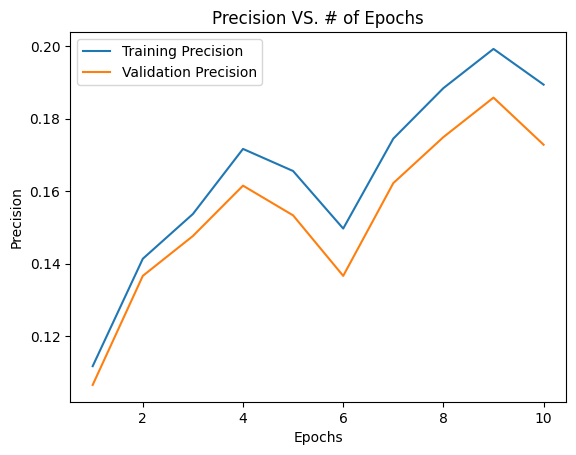

In [10]:
# your plotting code here
plt.plot(range(1, epochs + 1), train_precisions, label="Training Precision")
plt.plot(range(1, epochs + 1), val_precisions, label="Validation Precision")
plt.xlabel("Epochs")
plt.ylabel("Precision")
plt.title("Precision VS. # of Epochs")
plt.legend()
plt.show()

#We can run the code with a high enough epoch and determine what a good number of epochs should be. Like in this chart
#it is 8. But to find the best, we should set the epoch to be large enough. I did not do it because it takes a very
#long time to run. But that is the logic

b) Generate a plot that shows average precision for training and test sets as a function of the number of weights/parameters (# hidden nodes). For this part, you will be modifying the architecture that was given to you as a starting point.

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 4.0978 - accuracy: 0.0747 - val_loss: 3.8252 - val_accuracy: 0.1084
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 3.7515 - accuracy: 0.1267 - val_loss: 3.7629 - val_accuracy: 0.1348
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 3.6234 - accuracy: 0.1522 - val_loss: 3.6714 - val_accuracy: 0.1532
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 3.5393 - accuracy: 0.1649 - val_loss: 3.5963 - val_accuracy: 0.1600
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 3.4797 - accuracy: 0.1759 - val_loss: 3.5196 - val_accuracy: 0.1732
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 3.4456 - accuracy: 0.1819 - val_loss: 3.5340 - val_accuracy: 0.1699
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 3.4157 - accuracy: 0.1875 - val_loss: 3.5836 - val_ac

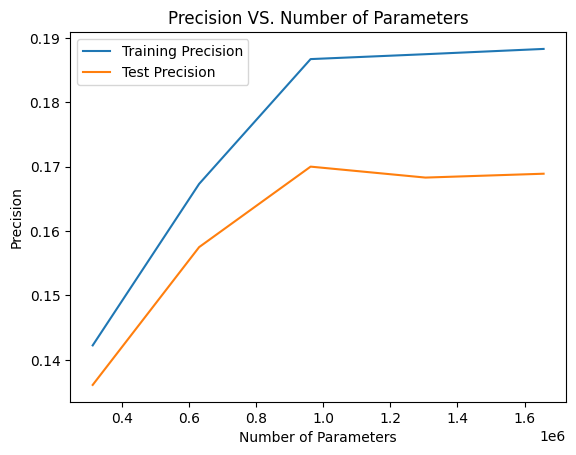

In [11]:
# your code here
#Resetting
(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')
x_train_original, x_test_original = x_train_original / 255.0, x_test_original / 255.0
y_train_original = tf.keras.utils.to_categorical(y_train_original, 100)
y_test_original = tf.keras.utils.to_categorical(y_test_original, 100)

#Bulding a function that builds and train the model based on the number of hidden nodes given to it and calculates precisions for test and training set
def build_and_train_model(hidden_nodes):
    # Build the model
    model = models.Sequential(name="CIFAR100_Model")
    model.add(layers.Flatten(input_shape=(32, 32, 3)))
    model.add(layers.Dense(hidden_nodes[0], activation="sigmoid"))
    model.add(layers.Dense(hidden_nodes[1], activation="sigmoid"))
    model.add(layers.Dense(100, activation="softmax"))

    # Compile and train the model
    model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=['accuracy'])
    history = model.fit(x_train_original, y_train_original, epochs=10, validation_data=(x_test_original, y_test_original))

    # Calculate precision
    y_train_pred = np.argmax(model.predict(x_train_original), axis=1)
    y_test_pred = np.argmax(model.predict(x_test_original), axis=1)
    train_prec = np.mean(y_train_pred == np.argmax(y_train_original, axis=1))
    test_prec = np.mean(y_test_pred == np.argmax(y_test_original, axis=1))

    return train_prec, test_prec, model.count_params()

# Define different numbers of hidden nodes to experiment with
hidden_nodes_list = [(500, 200), (400, 150), (300, 100), (200, 50), (100, 25)]

results = []
for i in hidden_nodes_list:
    results.append(build_and_train_model(i))

# Unpack results
train_precisions, test_precisions, total_params = zip(*results)

# Plot precision as a function of the number of parameters
plt.plot(total_params, train_precisions, label="Training Precision")
plt.plot(total_params, test_precisions, label="Test Precision")
plt.xlabel("Number of Parameters")
plt.ylabel("Precision")
plt.title("Precision VS. Number of Parameters")
plt.legend()
plt.show()

c) Generate a plot that shows average precision for training and test sets as a function of the number of instances in the training set. For this part, you will be modifying your training set. For instance, you can run 10 experiments where you first use a random 10% of the training data, a second experiment where you use a random 20% of the training data, and so on until
you use the entire training set. Keep the network hyperparameters constant during your experiments.

In [12]:
# your code here
from sklearn.model_selection import train_test_split

# Function to build and train the model
def build_and_train_model(x_train, y_train, x_test, y_test):
    model = models.Sequential(name="CIFAR100_Model")
    model.add(layers.Flatten(input_shape=(32, 32, 3)))
    model.add(layers.Dense(500, activation="sigmoid"))
    model.add(layers.Dense(200, activation="sigmoid"))
    model.add(layers.Dense(100, activation="softmax"))

    model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=0)
    
    y_train_pred = np.argmax(model.predict(x_train), axis=1)
    y_test_pred = np.argmax(model.predict(x_test), axis=1)
    train_prec = np.mean(y_train_pred == np.argmax(y_train, axis=1))
    test_prec = np.mean(y_test_pred == np.argmax(y_test, axis=1))

    return train_prec, test_prec

# Initial split for constant test set
x_train, _, y_train, _ = train_test_split(x_train_original, y_train_original, test_size=0.2, random_state=42)

# Varying the size of the training set
train_precisions = []
test_precisions = []
train_sizes = []

for i in range(1, 11):  # 10 experiments
    size = i  # Changing training set size from 10% to 100%
    x_train_split, _, y_train_split, _ = train_test_split(x_train, y_train, train_size=size, random_state=42)
    train_sizes.append(len(x_train_split))
    
    train_prec, test_prec = build_and_train_model(x_train_split, y_train_split, x_test_original, y_test_original)
    train_precisions.append(train_prec)
    test_precisions.append(test_prec)


313/313 [==============================] - 0s 1ms/step


d) Define the best network architecture from your experiments above and report the accuracy and average precision for all classes.



In [13]:
# your code here
avg_precisions = []
for e in range(10):
    e, test_prec = build_and_train_model(x_train, y_train, x_test_original, y_test_original)
    avg_precisions.append(test_prec)

average_precision = np.mean(avg_precisions)
print("Average Precision for All Classes:", average_precision)

313/313 [==============================] - 0s 1ms/step
Average Precision for All Classes: 0.18228


e) Can you improve test prediction performance by using an ensemble of neural networks? Explain with words (don't implement!)

Yes. With combining the prediction power of an ensemble of neural network we are able to improve the prediction performance. This is because each model makes predictions based on its own architecture and initialization and can capture a certain aspect of the dataset. So these models can correct each other's errors and improve test predictions.